# Projeto final de Machine Learning
***
## Professor : Adriano Veloso
## Aluna :        Ana Carolina Gontijo Graça
## Matrícula :  2016074242 

# Tema do trabalho : Classificação de imagens de raio-X torácico para identificação de pneumonia.
### Será analisado um banco de dados de imagens de raio-X toráxico que são classificadas como imagens de pulmões com e sem pneumonia. O treinamento será feito com redes __CNN__ e a escolha de parâmetros vai ser feita de acordo com os testes instânciados neste notebook.

### São utilizados 2 tipos de __CNN__ s que serão descritos melhor em breve.

In [1]:
# Instalação da função de redimensionamento das imagens
!pip install python-resize-image

aux_path = ''
# Suporte para o uso de documentos do drive no notebook
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#aux_path = '/content/drive/My Drive/'

# Imports de bibliotecas para analise e tratamento dos dados
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from resizeimage import resizeimage
import os
from keras.utils import to_categorical
import matplotlib as mpl

# Imports para processamento de imagem no keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

# Imports para desenvolvimento das redes neurais
from keras import layers
from keras import optimizers
from keras import models

# Imports de utilitários do sklearn para analise da acurácia
from sklearn import metrics

Using TensorFlow backend.


## Primeira parte ( NÃO SE APLICA ): Tratando as imagens
### De forma a facilitar o upload e o uso das imagens durante o aprendizado primeiro iremos reduzir todas as imagens para que seu lado de maior comprimento tenha no máximo 500 pixels.

##### (Isso foi realizado previamente ao envio no banco de dados original, baixado do kaggle)

In [2]:
#for dir_aux in []:
#    for filename in os.listdir('chest-xray-pneumonia/chest_xray/chest_xray/'+dir_aux):
#        if filename[-4:] == 'jpeg':
#            print(dir_aux+filename)
#            with open('chest-xray-pneumonia/chest_xray/chest_xray/'+dir_aux+filename, 'r+b') as f:
#                with Image.open(f) as image:
#                    try:
#                        if image.size[0] > image.size[1]:
#                            cover = resizeimage.resize_width(image, 500)
#                        else:
#                            cover = resizeimage.resize_height(image, 500)
#                        plt.imshow(cover)
#                        cover.save('resized_xrays/'+dir_aux+filename, image.format)
#                    except:
#                        continue

# Segunda parte: Preparando as imagens para o keras

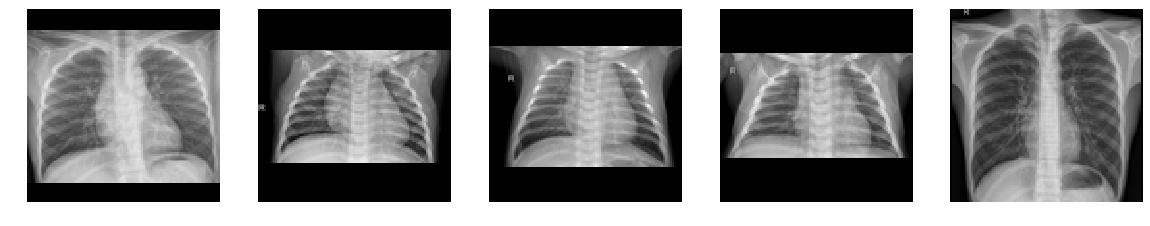

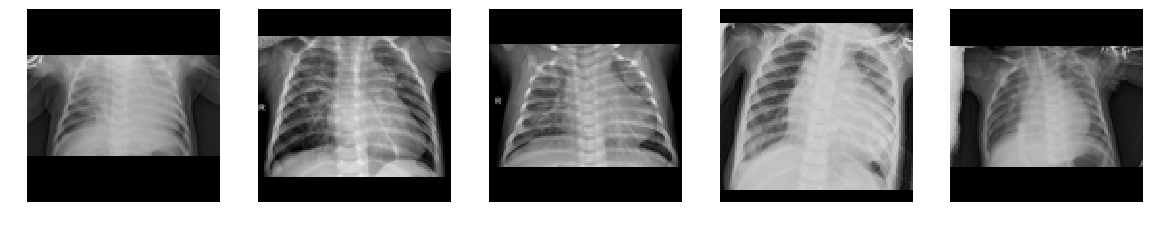

In [3]:
# Alguns exemplos dos dados para verificação
NORMAL = []
PNEUMONIA = []
i = 0
for filename in os.listdir(aux_path+'resized_xrays/test/NORMAL/'):
    with open(aux_path+'resized_xrays/test/NORMAL/'+filename, 'r+b') as f:
        with Image.open(f) as image:
            img = resizeimage.resize_contain(
                image,[100,100],bg_color=(0, 0, 0, 0)).convert('L')
        NORMAL.append(img)
    i+=1
    if i == 10:
        break
            
            
            
i = 0
for filename in os.listdir(aux_path+'resized_xrays/test/PNEUMONIA/'):
    with open(aux_path+'resized_xrays/test/PNEUMONIA/'+filename, 'r+b') as f:
        with Image.open(f) as image:
            img = resizeimage.resize_contain(
                image,[100,100],bg_color=(0, 0, 0, 0)).convert('L')
        PNEUMONIA.append(img)
    i+=1
    if i == 10:
        break
          
n_cols = 5
fig_1, axes_1 = plt.subplots(1, n_cols, figsize=(20, 5))
#fig_1.suptitle("Imagens sem pneumonia")
for j in range(n_cols):
    img_i = j
    axes_1[j].imshow(NORMAL[img_i], cmap="gray")
    axes_1[j].axis("off")
    
fig_2, axes_2 = plt.subplots(1, n_cols, figsize=(20, 5))

#fig_2.suptitle("Imagens com pneumonia")

for j in range(n_cols):
    img_i = j    
    axes_2[j].imshow(PNEUMONIA[img_i], cmap="gray")
    axes_2[j].axis("off")


In [4]:
# Carregamento e pre-processamento das imagens, separando entre validação e 
# treino. As imagens são redimensionadas para serem contidas em quadrados de 
# 100 x 100 pixels, com fundo preto.
data = {'train':[], 'train_class':[], 'val':[], 'val_class':[]}
classes = {'NORMAL':0, 'PNEUMONIA':1}

for dir_aux in ['train','val']:
    for classify in ['NORMAL','PNEUMONIA']:
        for filename in os.listdir(aux_path+'resized_xrays/'+dir_aux+'/'+
                                   classify+'/'):
            with open(aux_path+'resized_xrays/'+dir_aux+'/'+classify+'/'+
                      filename, 'r+b') as f:
                if filename[-4:] == 'jpeg':
                    with Image.open(f) as image:
                        print(filename)
                        img = resizeimage.resize_contain(
                            image,[100,100],bg_color=(0, 0, 0, 0)).convert('L')
                        data[dir_aux].append(img_to_array(img))
                        data[dir_aux+'_class'].append(np.array(classes[classify]))

                
for dir_aux in ['test']:
    for classify in ['NORMAL','PNEUMONIA']:
        for filename in os.listdir(aux_path+'resized_xrays/'+dir_aux+'/'+
                                   classify+'/'):
            with open(aux_path+'resized_xrays/'+dir_aux+'/'+classify+'/'+
                      filename, 'r+b') as f:
                if filename[-4:] == 'jpeg':
                    with Image.open(f) as image:
                        print(filename)
                        img = resizeimage.resize_contain(
                            image,[100,100],bg_color=(0, 0, 0, 0)).convert('L')
                        data['val'].append(img_to_array(img))
                        data['val_class'].append(np.array(classes[classify]))
            
# Transforma todas as listas em np arrays para uso nas redes neurais
data['train'] = np.array(data['train'])
data['train_class'] = np.array(data['train_class'])
data['val'] = np.array(data['val'])
data['val_class'] = np.array(data['val_class'])


NORMAL2-IM-0863-0001.jpeg
IM-0552-0001.jpeg
IM-0556-0001.jpeg
NORMAL2-IM-0744-0001.jpeg
NORMAL2-IM-0511-0001.jpeg
NORMAL2-IM-0952-0001.jpeg
IM-0215-0001.jpeg
IM-0522-0001.jpeg
NORMAL2-IM-0445-0001.jpeg
NORMAL2-IM-0465-0001.jpeg
IM-0624-0001-0002.jpeg
NORMAL2-IM-0528-0001.jpeg
NORMAL2-IM-1175-0001.jpeg
IM-0694-0001.jpeg
IM-0494-0001.jpeg
NORMAL2-IM-0818-0001-0002.jpeg
NORMAL2-IM-0976-0001.jpeg
NORMAL2-IM-0683-0001.jpeg
IM-0666-0001.jpeg
IM-0269-0001.jpeg
NORMAL2-IM-0657-0001.jpeg
NORMAL2-IM-1142-0001.jpeg
IM-0463-0001.jpeg
IM-0154-0001.jpeg
IM-0665-0001.jpeg
NORMAL2-IM-0837-0001.jpeg
NORMAL2-IM-0448-0001.jpeg
IM-0375-0001.jpeg
NORMAL2-IM-0418-0001.jpeg
IM-0377-0001.jpeg
NORMAL2-IM-0416-0001-0002.jpeg
NORMAL2-IM-0503-0001.jpeg
NORMAL2-IM-0621-0001.jpeg
NORMAL2-IM-0452-0001.jpeg
NORMAL2-IM-0827-0001.jpeg
IM-0235-0001.jpeg
IM-0441-0001.jpeg
NORMAL2-IM-1419-0001.jpeg
NORMAL2-IM-0875-0001.jpeg
NORMAL2-IM-1296-0001.jpeg
NORMAL2-IM-1088-0001.jpeg
NORMAL2-IM-0806-0001.jpeg
IM-0535-0001.jpeg
NOR

IM-0501-0001-0001.jpeg
IM-0145-0001.jpeg
NORMAL2-IM-1240-0001.jpeg
IM-0428-0001.jpeg
NORMAL2-IM-1171-0001.jpeg
IM-0379-0001.jpeg
IM-0525-0001-0002.jpeg
NORMAL2-IM-0472-0001.jpeg
IM-0209-0001.jpeg
IM-0350-0001.jpeg
NORMAL2-IM-1205-0001.jpeg
NORMAL2-IM-0440-0001.jpeg
IM-0298-0001.jpeg
NORMAL2-IM-1058-0001.jpeg
NORMAL2-IM-1314-0001.jpeg
IM-0222-0001.jpeg
IM-0635-0001.jpeg
NORMAL2-IM-0826-0001.jpeg
NORMAL2-IM-0790-0001.jpeg
IM-0517-0001-0001.jpeg
IM-0537-0001.jpeg
IM-0717-0001.jpeg
NORMAL2-IM-1311-0001.jpeg
IM-0695-0001.jpeg
NORMAL2-IM-1084-0001.jpeg
IM-0475-0001.jpeg
IM-0327-0001.jpeg
IM-0618-0001.jpeg
NORMAL2-IM-0427-0001.jpeg
NORMAL2-IM-0428-0001.jpeg
IM-0721-0001.jpeg
NORMAL2-IM-0383-0001.jpeg
NORMAL2-IM-1305-0001.jpeg
NORMAL2-IM-0664-0001.jpeg
NORMAL2-IM-0870-0001.jpeg
NORMAL2-IM-1128-0001-0001.jpeg
IM-0164-0001.jpeg
NORMAL2-IM-1116-0001-0002.jpeg
IM-0237-0001.jpeg
NORMAL2-IM-0635-0001.jpeg
NORMAL2-IM-1154-0001.jpeg
NORMAL2-IM-1285-0001.jpeg
IM-0540-0001.jpeg
NORMAL2-IM-0702-0001.jpeg

NORMAL2-IM-0408-0001.jpeg
NORMAL2-IM-1188-0001.jpeg
IM-0645-0001.jpeg
NORMAL2-IM-0967-0001.jpeg
NORMAL2-IM-0552-0001.jpeg
IM-0712-0001.jpeg
NORMAL2-IM-0682-0001.jpeg
NORMAL2-IM-0780-0001.jpeg
NORMAL2-IM-0808-0001.jpeg
NORMAL2-IM-1351-0001.jpeg
IM-0273-0001.jpeg
NORMAL2-IM-0944-0001.jpeg
IM-0700-0001.jpeg
NORMAL2-IM-1160-0001.jpeg
IM-0487-0001.jpeg
NORMAL2-IM-0533-0001.jpeg
IM-0365-0001.jpeg
NORMAL2-IM-0983-0001-0001.jpeg
NORMAL2-IM-0599-0001.jpeg
NORMAL2-IM-1241-0001.jpeg
IM-0389-0001.jpeg
NORMAL2-IM-1105-0001.jpeg
NORMAL2-IM-0520-0001.jpeg
IM-0595-0001.jpeg
NORMAL2-IM-0812-0001.jpeg
IM-0434-0001.jpeg
NORMAL2-IM-1147-0001.jpeg
IM-0261-0001.jpeg
NORMAL2-IM-0582-0001.jpeg
NORMAL2-IM-1227-0001.jpeg
IM-0224-0001.jpeg
IM-0185-0001.jpeg
NORMAL2-IM-1142-0001-0001.jpeg
IM-0236-0001.jpeg
IM-0506-0001.jpeg
NORMAL2-IM-0690-0001.jpeg
NORMAL2-IM-1253-0001.jpeg
IM-0383-0001.jpeg
NORMAL2-IM-0522-0001.jpeg
IM-0140-0001.jpeg
IM-0546-0001.jpeg
NORMAL2-IM-0600-0001.jpeg
IM-0433-0001.jpeg
IM-0549-0001.jpe

NORMAL2-IM-0518-0001.jpeg
NORMAL2-IM-0531-0001.jpeg
IM-0561-0001.jpeg
IM-0332-0001.jpeg
IM-0621-0001.jpeg
NORMAL2-IM-0425-0001.jpeg
NORMAL2-IM-1289-0001.jpeg
IM-0504-0001.jpeg
IM-0545-0001-0001.jpeg
IM-0523-0001-0001.jpeg
IM-0187-0001.jpeg
NORMAL2-IM-0947-0001.jpeg
NORMAL2-IM-1005-0001.jpeg
NORMAL2-IM-0694-0001.jpeg
IM-0347-0001.jpeg
IM-0519-0001-0002.jpeg
IM-0527-0001.jpeg
IM-0596-0001.jpeg
IM-0553-0001.jpeg
IM-0593-0001.jpeg
NORMAL2-IM-1348-0001.jpeg
IM-0446-0001.jpeg
NORMAL2-IM-1148-0001.jpeg
IM-0227-0001.jpeg
NORMAL2-IM-1242-0001.jpeg
IM-0393-0001.jpeg
NORMAL2-IM-1322-0001.jpeg
NORMAL2-IM-0828-0001.jpeg
NORMAL2-IM-1067-0001.jpeg
NORMAL2-IM-1120-0001.jpeg
IM-0137-0001.jpeg
NORMAL2-IM-0874-0001.jpeg
NORMAL2-IM-0576-0001.jpeg
IM-0553-0001-0002.jpeg
NORMAL2-IM-0843-0001.jpeg
NORMAL2-IM-1060-0001.jpeg
IM-0234-0001.jpeg
IM-0191-0001.jpeg
NORMAL2-IM-1266-0001-0002.jpeg
IM-0481-0001.jpeg
IM-0598-0001.jpeg
NORMAL2-IM-1306-0001.jpeg
NORMAL2-IM-1280-0001.jpeg
IM-0249-0001.jpeg
NORMAL2-IM-1014

person634_bacteria_2525.jpeg
person992_bacteria_2920.jpeg
person1416_virus_2427.jpeg
person1702_bacteria_4511.jpeg
person60_bacteria_286.jpeg
person1496_bacteria_3906.jpeg
person1911_bacteria_4815.jpeg
person472_virus_969.jpeg
person1372_bacteria_3500.jpeg
person520_bacteria_2204.jpeg
person1433_virus_2447.jpeg
person363_virus_742.jpeg
person445_virus_917.jpeg
person1030_virus_1722.jpeg
person316_bacteria_1470.jpeg
person348_virus_721.jpeg
person321_bacteria_1484.jpeg
person23_bacteria_89.jpeg
person556_bacteria_2326.jpeg
person442_virus_900.jpeg
person543_bacteria_2281.jpeg
person349_bacteria_1605.jpeg
person525_virus_1046.jpeg
person564_bacteria_2347.jpeg
person1140_bacteria_3083.jpeg
person382_bacteria_1740.jpeg
person1923_bacteria_4831.jpeg
person489_bacteria_2067.jpeg
person1455_virus_2490.jpeg
person735_bacteria_2638.jpeg
person1111_virus_1836.jpeg
person1111_bacteria_3052.jpeg
person1619_bacteria_4267.jpeg
person40_bacteria_204.jpeg
person1760_bacteria_4602.jpeg
person1880_bacte

person1101_bacteria_3042.jpeg
person1385_virus_2380.jpeg
person313_bacteria_1457.jpeg
person398_bacteria_1799.jpeg
person31_bacteria_164.jpeg
person1327_bacteria_3374.jpeg
person1022_virus_1712.jpeg
person1034_virus_1728.jpeg
person1144_bacteria_3089.jpeg
person406_bacteria_1820.jpeg
person1634_bacteria_4331.jpeg
person1242_virus_2109.jpeg
person328_virus_681.jpeg
person59_bacteria_282.jpeg
person1244_virus_2111.jpeg
person941_virus_1610.jpeg
person23_bacteria_98.jpeg
person146_virus_296.jpeg
person332_bacteria_1536.jpeg
person335_virus_690.jpeg
person1018_bacteria_2949.jpeg
person1729_bacteria_4557.jpeg
person140_virus_285.jpeg
person70_bacteria_345.jpeg
person325_bacteria_1501.jpeg
person327_virus_679.jpeg
person1294_virus_2222.jpeg
person1246_bacteria_3202.jpeg
person89_virus_168.jpeg
person266_bacteria_1239.jpeg
person575_bacteria_2374.jpeg
person266_bacteria_1247.jpeg
person300_bacteria_1423.jpeg
person1229_virus_2080.jpeg
person591_bacteria_2429.jpeg
person1353_virus_2333.jpeg
pe

person673_virus_1263.jpeg
person137_virus_281.jpeg
person496_bacteria_2095.jpeg
person92_virus_174.jpeg
person1320_bacteria_3340.jpeg
person438_virus_889.jpeg
person1044_virus_1740.jpeg
person545_bacteria_2289.jpeg
person966_bacteria_2891.jpeg
person1436_bacteria_3712.jpeg
person1441_virus_2454.jpeg
person1546_bacteria_4044.jpeg
person6_bacteria_22.jpeg
person1237_bacteria_3193.jpeg
person1145_virus_1905.jpeg
person292_virus_599.jpeg
person1002_bacteria_2933.jpeg
person1214_virus_2059.jpeg
person1720_bacteria_4545.jpeg
person629_bacteria_2507.jpeg
person1484_virus_2577.jpeg
person846_virus_1491.jpeg
person12_bacteria_46.jpeg
person1519_virus_2646.jpeg
person1328_virus_2294.jpeg
person1128_bacteria_3069.jpeg
person1355_virus_2336.jpeg
person464_virus_954.jpeg
person313_bacteria_1459.jpeg
person1746_bacteria_4585.jpeg
person969_bacteria_2894.jpeg
person72_bacteria_352.jpeg
person564_bacteria_2342.jpeg
person1072_bacteria_3006.jpeg
person33_bacteria_172.jpeg
person1488_virus_2587.jpeg
per

person764_virus_1392.jpeg
person1689_bacteria_4473.jpeg
person432_virus_881.jpeg
person1408_bacteria_3579.jpeg
person9_bacteria_41.jpeg
person28_bacteria_142.jpeg
person1168_bacteria_3114.jpeg
person258_bacteria_1214.jpeg
person1490_virus_2596.jpeg
person753_virus_1378.jpeg
person1944_bacteria_4869.jpeg
person458_bacteria_1952.jpeg
person1193_virus_2034.jpeg
person1626_bacteria_4291.jpeg
person639_virus_1220.jpeg
person515_bacteria_2189.jpeg
person1927_bacteria_4837.jpeg
person1458_virus_2503.jpeg
person140_virus_284.jpeg
person942_bacteria_2867.jpeg
person1868_bacteria_4743.jpeg
person539_virus_1069.jpeg
person656_virus_1238.jpeg
person1413_bacteria_3613.jpeg
person278_bacteria_1309.jpeg
person124_virus_250.jpeg
person913_virus_1570.jpeg
person1132_virus_1863.jpeg
person253_bacteria_1154.jpeg
person319_virus_646.jpeg
person1130_bacteria_3072.jpeg
person1651_bacteria_4381.jpeg
person257_bacteria_1195.jpeg
person1679_bacteria_4450.jpeg
person535_virus_1062.jpeg
person574_bacteria_2370.j

person1074_bacteria_3012.jpeg
person1281_bacteria_3244.jpeg
person863_bacteria_2785.jpeg
person1351_virus_2330.jpeg
person77_bacteria_376.jpeg
person1172_bacteria_3119.jpeg
person1108_bacteria_3049.jpeg
person4_bacteria_14.jpeg
person1176_virus_1996.jpeg
person537_bacteria_2262.jpeg
person1019_virus_1708.jpeg
person1413_bacteria_3620.jpeg
person1134_bacteria_3076.jpeg
person1356_virus_2337.jpeg
person1497_bacteria_3912.jpeg
person1096_bacteria_3037.jpeg
person439_virus_891.jpeg
person445_virus_919.jpeg
person689_bacteria_2586.jpeg
person1468_virus_2545.jpeg
person26_bacteria_124.jpeg
person832_bacteria_2743.jpeg
person569_virus_1110.jpeg
person744_virus_1367.jpeg
person267_bacteria_1251.jpeg
person875_bacteria_2798.jpeg
person24_bacteria_109.jpeg
person70_bacteria_344.jpeg
person491_bacteria_2071.jpeg
person440_virus_893.jpeg
person1007_virus_1690.jpeg
person1007_bacteria_2938.jpeg
person356_bacteria_1638.jpeg
person1026_bacteria_2957.jpeg
person284_virus_582.jpeg
person1567_bacteria_4

person1716_bacteria_4533.jpeg
person1528_bacteria_3996.jpeg
person1502_bacteria_3922.jpeg
person1008_bacteria_2939.jpeg
person647_virus_1228.jpeg
person836_bacteria_2752.jpeg
person596_bacteria_2446.jpeg
person531_bacteria_2235.jpeg
person1226_virus_2077.jpeg
person387_bacteria_1770.jpeg
person917_bacteria_2842.jpeg
person1094_virus_1814.jpeg
person489_virus_994.jpeg
person949_virus_1620.jpeg
person1639_bacteria_4347.jpeg
person580_bacteria_2387.jpeg
person774_virus_1403.jpeg
person1527_bacteria_3990.jpeg
person1320_bacteria_3348.jpeg
person1183_bacteria_3131.jpeg
person1369_virus_2356.jpeg
person264_bacteria_1231.jpeg
person401_virus_795.jpeg
person1725_bacteria_4550.jpeg
person1191_virus_2032.jpeg
person1935_bacteria_4850.jpeg
person765_virus_1393.jpeg
person935_virus_1597.jpeg
person30_bacteria_149.jpeg
person389_virus_778.jpeg
person1006_bacteria_2937.jpeg
person600_bacteria_2458.jpeg
person671_bacteria_2564.jpeg
person128_virus_261.jpeg
person1206_bacteria_3158.jpeg
person759_viru

person1005_virus_1688.jpeg
person54_bacteria_258.jpeg
person373_virus_756.jpeg
person670_virus_1259.jpeg
person1143_virus_1896.jpeg
person1473_bacteria_3836.jpeg
person281_bacteria_1324.jpeg
person413_bacteria_1831.jpeg
person58_bacteria_274.jpeg
person88_virus_164.jpeg
person1507_bacteria_3945.jpeg
person531_bacteria_2240.jpeg
person1073_bacteria_3011.jpeg
person1100_virus_1820.jpeg
person439_virus_890.jpeg
person255_bacteria_1188.jpeg
person1476_bacteria_3843.jpeg
person1429_bacteria_3690.jpeg
person1420_virus_2431.jpeg
person76_bacteria_371.jpeg
person1493_bacteria_3896.jpeg
person296_bacteria_1392.jpeg
person548_bacteria_2297.jpeg
person1068_bacteria_3002.jpeg
person1325_bacteria_3366.jpeg
person477_bacteria_2028.jpeg
person463_virus_952.jpeg
person23_bacteria_103.jpeg
person489_bacteria_2065.jpeg
person61_bacteria_288.jpeg
person441_bacteria_1915.jpeg
person1038_virus_1733.jpeg
person258_bacteria_1207.jpeg
person1932_bacteria_4843.jpeg
person617_virus_1187.jpeg
person1571_bacteria

person275_bacteria_1294.jpeg
person790_virus_1421.jpeg
person348_virus_715.jpeg
person994_virus_1672.jpeg
person1391_bacteria_3537.jpeg
person24_bacteria_112.jpeg
person445_virus_914.jpeg
person57_bacteria_271.jpeg
person614_virus_1183.jpeg
person1545_bacteria_4042.jpeg
person847_virus_1492.jpeg
person507_bacteria_2139.jpeg
person111_virus_210.jpeg
person630_bacteria_2515.jpeg
person798_virus_1430.jpeg
person921_virus_1578.jpeg
person43_bacteria_216.jpeg
person1585_bacteria_4155.jpeg
person1053_bacteria_2987.jpeg
person516_bacteria_2192.jpeg
person448_bacteria_1936.jpeg
person1637_bacteria_4339.jpeg
person391_virus_781.jpeg
person1352_bacteria_3445.jpeg
person1455_bacteria_3784.jpeg
person60_bacteria_285.jpeg
person1140_virus_1885.jpeg
person515_bacteria_2188.jpeg
person1860_bacteria_4732.jpeg
person1407_virus_2410.jpeg
person586_bacteria_2418.jpeg
person1454_bacteria_3781.jpeg
person1020_bacteria_2951.jpeg
person512_bacteria_2154.jpeg
person605_bacteria_2466.jpeg
person427_bacteria_18

person465_bacteria_1980.jpeg
person952_virus_1623.jpeg
person1123_virus_1848.jpeg
person1458_virus_2501.jpeg
person1579_bacteria_4133.jpeg
person47_bacteria_229.jpeg
person96_virus_179.jpeg
person1595_bacteria_4183.jpeg
person1702_bacteria_4510.jpeg
person321_bacteria_1483.jpeg
person258_bacteria_1216.jpeg
person351_virus_726.jpeg
person294_bacteria_1386.jpeg
person1083_bacteria_3023.jpeg
person1198_bacteria_3148.jpeg
person1522_virus_2651.jpeg
person597_virus_1150.jpeg
person1496_virus_2606.jpeg
person1080_virus_1791.jpeg
person307_virus_629.jpeg
person1582_bacteria_4137.jpeg
person55_bacteria_261.jpeg
person151_virus_302.jpeg
person1234_virus_2093.jpeg
person1261_virus_2147.jpeg
person459_virus_947.jpeg
person1513_bacteria_3962.jpeg
person1104_virus_1826.jpeg
person472_bacteria_2010.jpeg
person1340_bacteria_3405.jpeg
person1260_bacteria_3218.jpeg
person61_bacteria_289.jpeg
person1142_bacteria_3086.jpeg
person424_bacteria_1859.jpeg
person1551_bacteria_4054.jpeg
person1599_bacteria_420

person337_bacteria_1558.jpeg
person1365_bacteria_3489.jpeg
person1648_bacteria_4375.jpeg
person472_bacteria_2015.jpeg
person1576_bacteria_4121.jpeg
person281_bacteria_1330.jpeg
person1344_bacteria_3421.jpeg
person776_virus_1405.jpeg
person1718_bacteria_4538.jpeg
person1130_virus_1860.jpeg
person1411_bacteria_3598.jpeg
person86_virus_159.jpeg
person761_bacteria_2665.jpeg
person1222_virus_2071.jpeg
person1115_bacteria_3056.jpeg
person782_bacteria_2686.jpeg
person600_virus_1156.jpeg
person614_bacteria_2483.jpeg
person58_bacteria_278.jpeg
person1121_virus_1846.jpeg
person591_virus_1139.jpeg
person1418_bacteria_3636.jpeg
person60_bacteria_287.jpeg
person1381_virus_2375.jpeg
person113_virus_215.jpeg
person516_virus_1033.jpeg
person691_bacteria_2588.jpeg
person151_virus_301.jpeg
person1417_bacteria_3635.jpeg
person1699_bacteria_4498.jpeg
person153_virus_304.jpeg
person257_bacteria_1197.jpeg
person1554_bacteria_4057.jpeg
person771_virus_1399.jpeg
person1180_virus_2014.jpeg
person1098_virus_181

person25_bacteria_116.jpeg
person1169_virus_1968.jpeg
person63_bacteria_306.jpeg
person1164_virus_1955.jpeg
person1657_bacteria_4399.jpeg
person1543_virus_2684.jpeg
person70_bacteria_346.jpeg
person1823_bacteria_4682.jpeg
person544_virus_1075.jpeg
person581_bacteria_2392.jpeg
person1306_bacteria_3274.jpeg
person543_bacteria_2284.jpeg
person906_virus_1562.jpeg
person414_bacteria_1835.jpeg
person30_bacteria_151.jpeg
person1595_virus_2771.jpeg
person1171_bacteria_3118.jpeg
person331_bacteria_1526.jpeg
person280_bacteria_1320.jpeg
person111_virus_209.jpeg
person1345_bacteria_3422.jpeg
person1476_virus_2560.jpeg
person739_bacteria_2642.jpeg
person520_bacteria_2203.jpeg
person579_virus_1123.jpeg
person1495_virus_2603.jpeg
person366_bacteria_1664.jpeg
person51_bacteria_239.jpeg
person1582_bacteria_4140.jpeg
person1311_virus_2259.jpeg
person1176_bacteria_3124.jpeg
person442_virus_899.jpeg
person1514_bacteria_3964.jpeg
person533_bacteria_2250.jpeg
person915_virus_1572.jpeg
person572_bacteria_23

person266_bacteria_1240.jpeg
person1507_bacteria_3948.jpeg
person1109_bacteria_3050.jpeg
person1527_bacteria_3989.jpeg
person347_bacteria_1595.jpeg
person1218_bacteria_3171.jpeg
person1405_bacteria_3566.jpeg
person34_bacteria_176.jpeg
person292_virus_600.jpeg
person413_bacteria_1829.jpeg
person423_bacteria_1854.jpeg
person1059_bacteria_2993.jpeg
person1619_bacteria_4261.jpeg
person1411_bacteria_3610.jpeg
person28_bacteria_139.jpeg
person677_virus_1268.jpeg
person952_bacteria_2877.jpeg
person616_virus_1186.jpeg
person409_virus_818.jpeg
person438_bacteria_1890.jpeg
person119_virus_225.jpeg
person1205_bacteria_3157.jpeg
person1413_virus_2423.jpeg
person509_bacteria_2145.jpeg
person1271_virus_2164.jpeg
person41_bacteria_208.jpeg
person312_bacteria_1456.jpeg
person853_bacteria_2774.jpeg
person505_virus_1017.jpeg
person312_virus_635.jpeg
person1670_bacteria_4429.jpeg
person1536_virus_2673.jpeg
person374_bacteria_1710.jpeg
person277_bacteria_1304.jpeg
person562_virus_1102.jpeg
person835_virus

NORMAL2-IM-0221-0001.jpeg
NORMAL2-IM-0290-0001.jpeg
NORMAL2-IM-0302-0001.jpeg
IM-0003-0001.jpeg
IM-0007-0001.jpeg
NORMAL2-IM-0030-0001.jpeg
NORMAL2-IM-0278-0001.jpeg
NORMAL2-IM-0281-0001.jpeg
NORMAL2-IM-0366-0001.jpeg
NORMAL2-IM-0372-0001.jpeg
NORMAL2-IM-0346-0001.jpeg
NORMAL2-IM-0378-0001.jpeg
IM-0025-0001.jpeg
NORMAL2-IM-0333-0001.jpeg
NORMAL2-IM-0102-0001.jpeg
IM-0028-0001.jpeg
IM-0105-0001.jpeg
NORMAL2-IM-0241-0001.jpeg
NORMAL2-IM-0271-0001.jpeg
IM-0019-0001.jpeg
NORMAL2-IM-0210-0001.jpeg
NORMAL2-IM-0286-0001.jpeg
NORMAL2-IM-0092-0001.jpeg
NORMAL2-IM-0060-0001.jpeg
NORMAL2-IM-0135-0001.jpeg
NORMAL2-IM-0359-0001.jpeg
NORMAL2-IM-0045-0001.jpeg
NORMAL2-IM-0357-0001.jpeg
NORMAL2-IM-0130-0001.jpeg
IM-0033-0001-0002.jpeg
NORMAL2-IM-0238-0001.jpeg
IM-0070-0001.jpeg
NORMAL2-IM-0329-0001.jpeg
NORMAL2-IM-0081-0001.jpeg
NORMAL2-IM-0207-0001.jpeg
IM-0022-0001.jpeg
NORMAL2-IM-0246-0001-0002.jpeg
NORMAL2-IM-0173-0001-0002.jpeg
IM-0083-0001.jpeg
NORMAL2-IM-0294-0001.jpeg
IM-0031-0001.jpeg
NORMAL2

person108_bacteria_507.jpeg
person161_bacteria_762.jpeg
person88_bacteria_437.jpeg
person100_bacteria_478.jpeg
person1675_virus_2891.jpeg
person1633_virus_2829.jpeg
person100_bacteria_479.jpeg
person1615_virus_2801.jpeg
person150_bacteria_717.jpeg
person138_bacteria_659.jpeg
person1676_virus_2892.jpeg
person139_bacteria_665.jpeg
person125_bacteria_595.jpeg
person141_bacteria_681.jpeg
person120_bacteria_570.jpeg
person143_bacteria_689.jpeg
person83_bacteria_409.jpeg
person1_virus_12.jpeg
person97_bacteria_468.jpeg
person1653_virus_2858.jpeg
person132_bacteria_632.jpeg
person136_bacteria_648.jpeg
person1_virus_11.jpeg
person22_virus_55.jpeg
person96_bacteria_464.jpeg
person3_virus_17.jpeg
person20_virus_51.jpeg
person1678_virus_2895.jpeg
person133_bacteria_638.jpeg
person94_bacteria_458.jpeg
person95_bacteria_463.jpeg
person143_bacteria_688.jpeg
person65_virus_123.jpeg
person117_bacteria_556.jpeg
person82_bacteria_404.jpeg
person78_bacteria_378.jpeg
person120_bacteria_572.jpeg
person136_

# Terceira parte: Treinamentos dos CNNs

In [5]:
# Função para plotar os resultados do treino de acurácia e perda
def plot_results_by_history(history):
    # Gera graficos do resultado do treino
    mpl.rc("font", **{"size": 14})
    fig, axes = plt.subplots(1, 2, figsize=(17, 7))

    # Loss
    axes[0].plot(range(1, len(history.history["loss"])+1), 
                 history.history["loss"], label="Train Loss", color="red", lw=3)
    axes[0].plot(range(1, len(history.history["val_loss"])+1), 
                 history.history["val_loss"], label="Train Loss", 
                 color="black", lw=3)
    axes[1].set_ylim(bottom=0)
    axes[0].set_ylabel("Loss")
    axes[0].set_xlabel("Epoch")
    axes[0].set_xticks(range(1, len(history.history["acc"])+1))
    axes[0].legend()

    # Accuracy
    axes[1].plot(range(1, len(history.history["acc"])+1), 
                 history.history["acc"], label="Train ACC", color="red", lw=3)
    axes[1].plot(range(1, len(history.history["val_acc"])+1), 
                 history.history["val_acc"], label="Teste ACC", 
                 color="black", lw=3)
    axes[1].set_ylim(0.5,1)
    axes[1].set_ylabel("Accuracy")
    axes[1].set_xlabel("Epoch")
    axes[1].set_xticks(range(1, len(history.history["acc"])+1))
    axes[1].legend()
    plt.show()

In [6]:
# Normaliza a intensidade dos pixels para o intervalo [0, 1]
data['train'] = data['train']/255
data['val'] = data['val']/255

In [7]:
# Primeiro tipo de CNN:
# conv -> pool -> conv -> pool -> conv -> pool -> dense -> dense -> sigmoid
def run_cnn_1(conv1, conv2, conv3, train, test, img_shape, lr=0.001, fc1=5, 
              do=0.5, n_classes=None, model=None):
    
    model_input = layers.Input(shape=img_shape, name="Input")
    

    x = layers.Conv2D(2**(conv1), kernel_size=(3, 3), activation="relu", 
                      padding="same", name="Conv1")(model_input)
    x = layers.MaxPooling2D(pool_size=(2, 2), name="Pool1")(x)
    x = layers.SpatialDropout2D(rate=do, name='Dropout2D_1')(x)
    x = layers.Conv2D(2**(conv2), kernel_size=(3, 3), activation="relu", 
                      padding="same", name="Conv2")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), name="Pool2")(x)
    x = layers.SpatialDropout2D(rate=do, name='Dropout2D_2')(x)
    x = layers.Conv2D(2**(conv3), kernel_size=(3, 3), activation="relu", 
                      padding="same", name="Conv4")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), name="Pool3")(x)
    x = layers.SpatialDropout2D(rate=do, name='Dropout2D_3')(x)

    x = layers.Flatten(name="Flatten")(x)

    x = layers.Dense(2**(fc1), activation="relu", name="FC1")(x)
    
    x = layers.Dense(2**(fc1-1), activation="relu", name="FC2")(x)
    
    x = layers.Dropout(rate=do,name='Dropout')(x)
    
    model_output = layers.Dense(n_classes, activation='sigmoid', 
                                name="Output")(x)

    model = models.Model(model_input, model_output)

    # Inicializa o otimizador. Adam é uma variação do SGD
    optimizer = optimizers.Adam(lr=lr)

    # Compila o modelo, escolhendo a funcao de perda e a metrica principal
    model.compile(optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    model.summary()

    # Treina por 10 epocas com mini-batches de 32 exemplos.
    # A API aceita tambem dados de validacao, que sao usadas ao final 
    # de cada epoca para medir a metrica principal
    

    history = model.fit(train[0], train[1], batch_size=8, 
                        epochs=20, validation_data=test)
    
    return history, model

In [9]:
for i in [5,6,7]:
    for j in [7,8]:
        for k in [8,9]:
            history, model = run_cnn_1(conv1=i, conv2=j, conv3=k,
                                       train=(data['train'],
                                              data['train_class']),
                                       test=(data['val'],
                                             data['val_class']), 
                                       img_shape=(100,100, 1), n_classes=1)
            plot_results_by_history(history)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 100, 100, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 100, 100, 32)      320       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 50, 50, 32)        0         
_________________________________________________________________
Dropout2D_1 (SpatialDropout2 (None, 50, 50, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 50, 50, 128)       36992     
_________________________________________________________________
Pool2 (MaxPooling2D) 

KeyboardInterrupt: 

In [10]:
# Segundo tipo de CNN:
# conv -> conv -> pool ->  conv -> conv -> pool -> dense -> dense -> sigmoid
def run_cnn_2(conv1, conv2, conv3, conv4, train, test, img_shape, fc1=5, do=0.5, 
              lr=0.001, n_classes=None, model=None):
    
    model_input = layers.Input(shape=img_shape, name="Input")

    x = layers.Conv2D(2**(conv1), kernel_size=(3, 3), activation="relu", 
                      padding="same", name="Conv1")(model_input)
    x = layers.Conv2D(2**(conv2), kernel_size=(3, 3), activation="relu", 
                      padding="same", name="Conv2")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), name="Pool1")(x)
    x = layers.SpatialDropout2D(rate=do, name='Dropout2D_1')(x)
    x = layers.Conv2D(2**(conv3), kernel_size=(3, 3), activation="relu", 
                      padding="same", name="Conv3")(x)
    x = layers.Conv2D(2**(conv4), kernel_size=(3, 3), activation="relu", 
                      padding="same", name="Conv4")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), name="Pool2")(x)
    x = layers.SpatialDropout2D(rate=do, name='Dropout2D_2')(x)

    x = layers.Flatten(name="Flatten")(x)

    x = layers.Dense(2**(fc1), activation="relu", name="FC1")(x)
    
    x = layers.Dense(2**(fc1-1), activation="relu", name="FC2")(x)
    
    model_output = layers.Dense(n_classes, activation='sigmoid', 
                                name="Output")(x)

    model = models.Model(model_input, model_output)

    # Inicializa o otimizador. Adam é uma variação do SGD
    optimizer = optimizers.Adam(lr=lr)

    # Compila o modelo, escolhendo a funcao de perda e a metrica principal
    model.compile(optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    model.summary()

    # Treina por 10 epocas com mini-batches de 32 exemplos.
    # A API aceita tambem dados de validacao, que sao usadas ao final 
    # de cada epoca para medir a metrica principal
    

    history = model.fit(train[0], train[1], batch_size=16, 
                        epochs=20, validation_data=test)
    
    return history, model

In [11]:
for i in [5,6,7]:
    for j in [7,8]:
        for k in [8,9]:
            history, model = run_cnn_2(conv1=i, conv2=j, conv3=j, conv4=k,
                                       train=(data['train'],
                                              data['train_class']), 
                                       test=(data['val'],
                                             data['val_class']), 
                                       img_shape=(100,100, 1), n_classes=1)
            plot_results_by_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 100, 100, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 100, 100, 32)      320       
_________________________________________________________________
Conv2 (Conv2D)               (None, 100, 100, 128)     36992     
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 50, 50, 128)       0         
_________________________________________________________________
Dropout2D_1 (SpatialDropout2 (None, 50, 50, 128)       0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 50, 50, 128)       147584    
_________________________________________________________________
Conv4 (Conv2D)               (None, 50, 50, 256)       295168    
__________

KeyboardInterrupt: 